### [Q1.] What is the mathematical formula for a linear SVM?
##### [Ans]

The mathematical formula for a Linear SVM is,
$$w^T + b = 0$$

### [Q2.] What is the objective function of a linear SVM?
##### [Ans]

For a Hard Margin Objective function of SVM is:
$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

For a Soft Margin Objective function of SVM is:
$$
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i
$$
where, C is the regularisation parameter and ξi are slack variables.


### [Q3.] What is the kernel trick in SVM?
##### [Ans]

The kernel trick allows SVM to operate in a high-dimensional space without explicitly transforming the data into that space. It computes the dot product between two vectors in the high-dimensional feature space using a kernel function K(xi,xj).

### [Q4.] What is the role of support vectors in SVM Explain with example
##### [Ans]

Support vectors are the data points closest to the decision boundary (hyperplane) and determine the margin. The SVM algorithm uses only these points to find the optimal hyperplane.

Example: In a 2D dataset, the support vectors are the points closest to the boundary line. Removing non-support vectors would not affect the decision boundary.



### [Q5.] Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
##### [Ans]


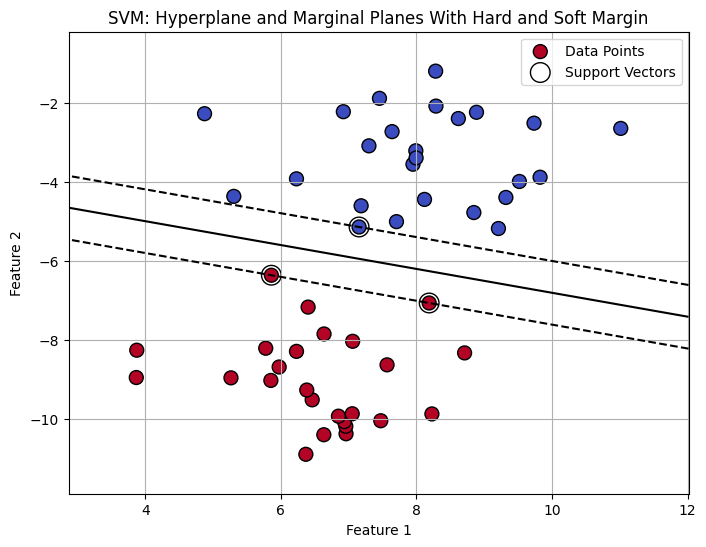

In [6]:
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples=50, centers=2, cluster_std=1.2, random_state=6)

svm = SVC(kernel='linear', C=1)
svm.fit(X,y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100, label="Data Points")
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors="none", edgecolors="k", label="Support Vectors")
plt.title("SVM: Hyperplane and Marginal Planes With Hard and Soft Margin")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

### [Q6.] SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy : 1.00


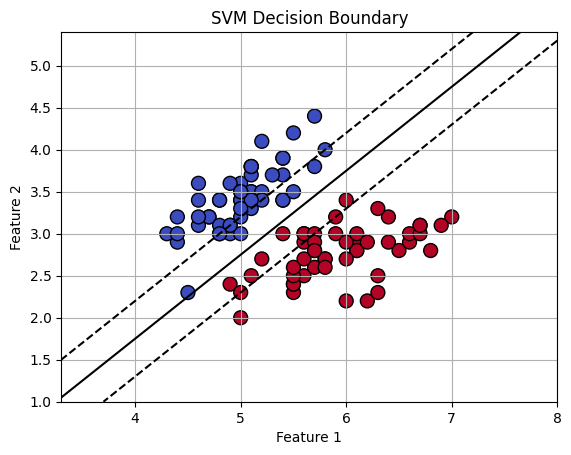

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X,y = X[y<2], y[y<2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100), np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()


### BONUS TASK
##### [Ans]

Custom SVM Accuracy: 1.00
Scikit-learn SVM Accuracy: 1.00


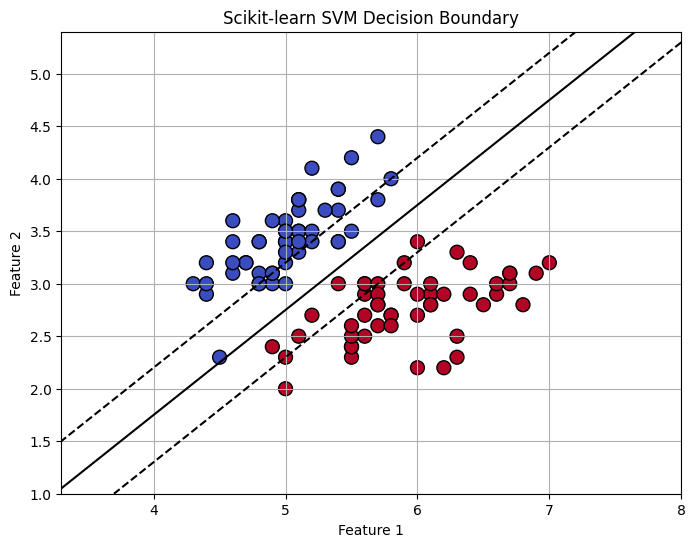

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X,y = X[y<2], y[y<2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class SimpleSVM:
    def __init__(self, lr=0.001, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y == 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                if y[idx] * (np.dot(x_i, self.w) + self.b) < 1:
                    self.w += self.lr * (y[idx] * x_i - 0.01 * self.w)
                    self.b += self.lr * y[idx]
                else:
                    self.w += self.lr * (-0.01 * self.w)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

custom_svm = SimpleSVM(lr=0.001, epochs=1000)
custom_svm.fit(X_train, y_train)
y_pred_custom = custom_svm.predict(X_test)
custom_accuracy = accuracy_score(y_test, np.where(y_pred_custom == -1, 0, 1))
print(f"Custom SVM Accuracy: {custom_accuracy:.2f}")

sklearn_svm = SVC(kernel="linear", C=1)
sklearn_svm.fit(X_train, y_train)
y_pred_sklearn = sklearn_svm.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn SVM Accuracy: {sklearn_accuracy:.2f}")

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = sklearn_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
plt.title("Scikit-learn SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()